# Python Data Analysis and Visualization (Web Scraper) - 16CSU015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Open URL and Parse Raw Data

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [4]:
# Parse Raw Data from URL using HTML parser
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
print(soup.title)
#print(soup.get_text())

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


# Basic HTML tag Retrieval

In [6]:
soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="http://hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="http://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="http://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [7]:
links = soup.find_all('a')
for link in links:
    print(link.get('href'))

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [8]:
rows = soup.find_all('tr')
rows[:10]

[<tr><td>Finishers:</td><td>577</td></tr>,
 <tr><td>Male:</td><td>414</td></tr>,
 <tr><td>Female:</td><td>163</td></tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Chip Pace</th>
 <th>Gender Place</th>
 <th>Age Group</th>
 <th>Age Group Place</th>
 <th>Time to Start</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>,
 <tr>
 <td>1</td>
 <td>814</td>
 <td>JARED WILSON</td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>00:36:21</td>
 <td>05:51</td>
 <td>1 of 414</td>
 <td>M 36-45</td>
 <td>1 of 152</td>
 <td>00:00:03</td>
 <td>00:36:24</td>
 <td></td>
 </tr>,
 <tr>
 <td>2</td>
 <td>573</td>
 <td>NATHAN A SUSTERSIC</td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>00:36:42</td>
 <td>05:55</td>
 <td>2 of 414</td>
 <td>M 26-35</td>
 <td>1 of 154</td>
 <td>00:00:03</td>
 <td>00:36:45</td>
 <td>INTEL TEAM F</td>
 </tr>,
 <tr>
 <td>3</td>
 <td>687</td>
 <td>FRANCISCO MAYA</td>
 <td>M</td>
 <td>PORTLA

In [9]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [10]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [11]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

# Raw Data to DataFrame Conversion

In [12]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


# Cleaning Numeric Data in DataFrame

In [13]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [14]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [15]:
# All Labels in the dataframe
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [16]:
# Raw data to list conversion (DataFrame labels)
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [17]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [18]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [19]:
# Merging data to new DataFrame
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [20]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [21]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 595
Data columns (total 14 columns):
[Place              597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 37.3+ KB


(597, 14)

In [22]:
df6 = df5.dropna(axis=0, how='any')
df6.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]
10,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,]
11,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,]
12,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B]


In [23]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [24]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


# Final DataFrame 

In [25]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [26]:
time_list = df7[' Chip Time'].tolist()

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

In [27]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [28]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [29]:
time_list1 = df7[' Gun Time'].tolist()
time_mins1 = []
for i in time_list1:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins1.append(math)

In [30]:
df7['Gun_mins'] = time_mins1
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins,Gun_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000,36.400000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000,36.750000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333,37.800000
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667,38.616667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000,39.400000


In [31]:
df7.describe(include=[np.number])

,Runner_mins,Gun_mins
count,577.000000,577.000000
mean,60.035933,60.631340
std,11.970623,12.110846
min,36.350000,36.400000
25%,51.000000,51.450000
50%,59.016667,59.900000
75%,67.266667,68.000000
max,101.300000,102.166667


# Visualization of Summary Statistics

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x10f50af0>],
 <a list of 1 Text xticklabel objects>)

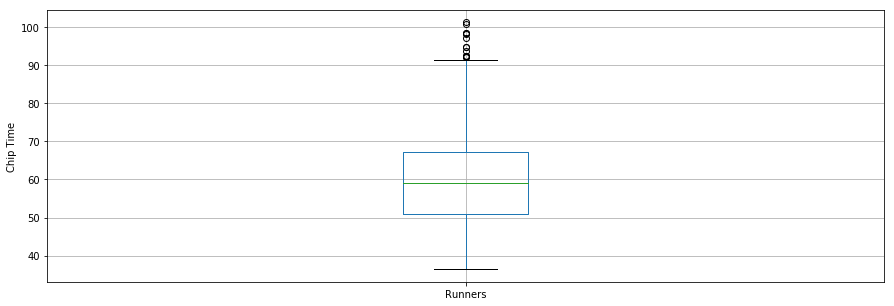

In [33]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

([<matplotlib.axis.XTick at 0x11184470>],
 <a list of 1 Text xticklabel objects>)

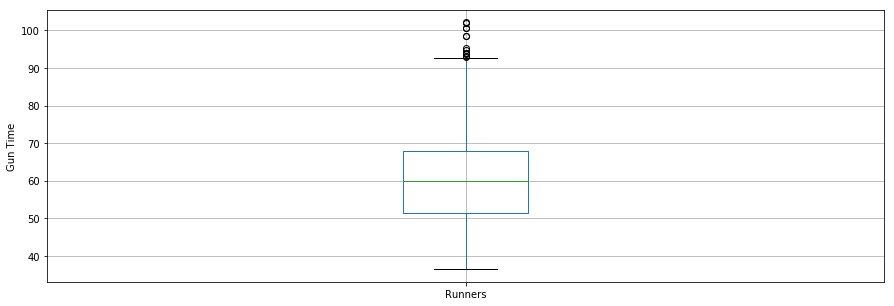

In [34]:
df7.boxplot(column='Gun_mins')
plt.grid(True, axis='y')
plt.ylabel('Gun Time')
plt.xticks([1], ['Runners'])

# Distribution Plot for Runner's finish time

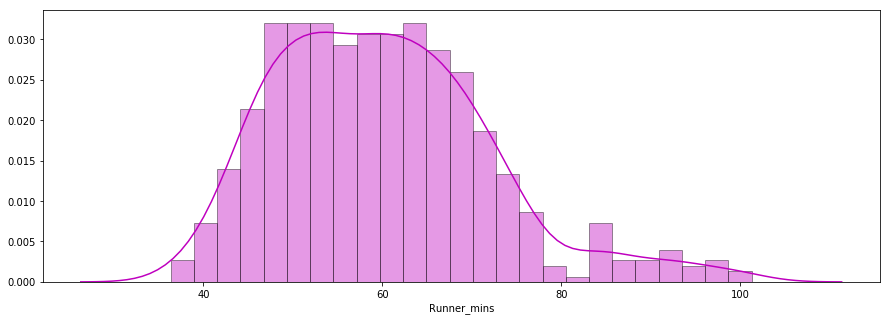

In [35]:
# Chip Time
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

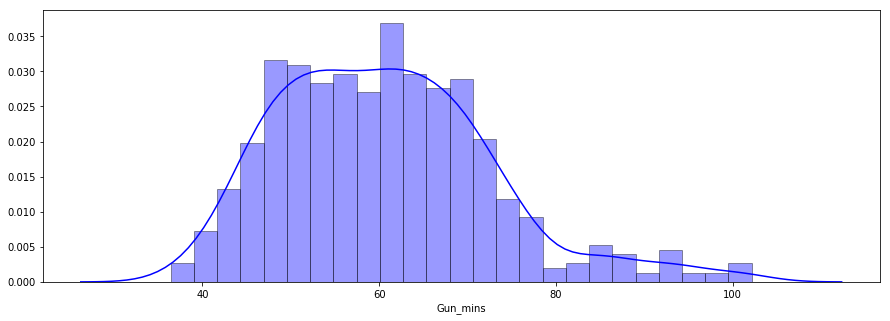

In [36]:
# Gun Time
x = df7['Gun_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='b', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

# Performance Difference between Males and Females

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


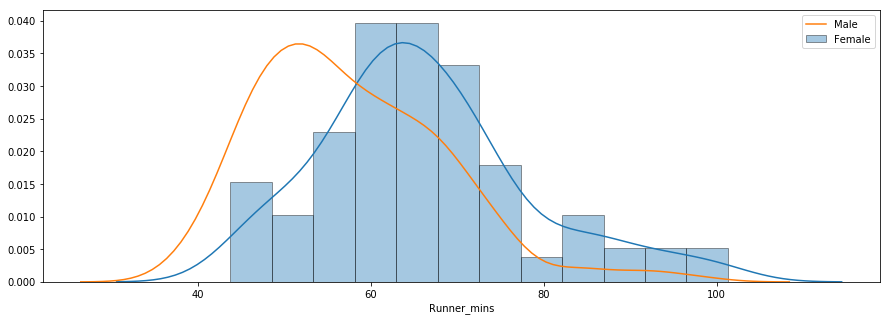

In [37]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [38]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Gun_mins                                                      \
           count       mean        std        min        25%     50%   
 Gender                                                                
 F         163.0  66.743252  12.287397  43.866667  59.283333  65.200   
 M         414.0  58.224960  11.170953  36.400000  49.787500  56.475   

                               Runner_mins                                   \
               75%         max       count       mean        std        min   
 Gender                                                                       
 F       72.358333  102.166667       163.0  66.119223  12.184440  43.766667   
 M       65.429167  100.533333       414.0  57.640821  11.011857  36.350000   

                                                      
               25%        50%        75%         max  
 Gender                                               
 F       58.758333  64.616667  72.058333  101.300000  
 M       49.395833  55.

# Summary stats for finish time -- Gender based

Text(0.5, 0.98, '')

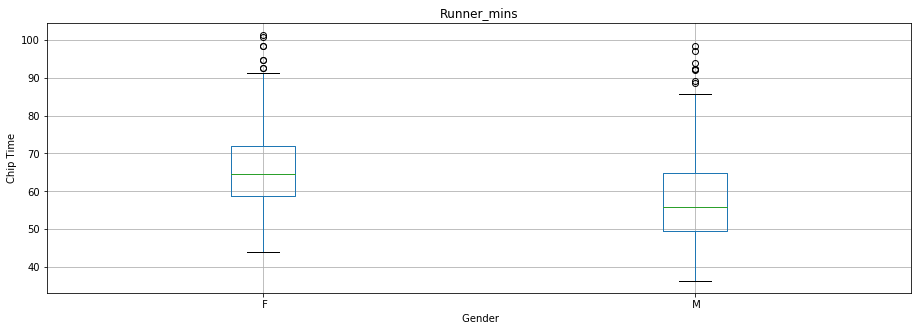

In [39]:
# Chip Time
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

Text(0.5, 0.98, '')

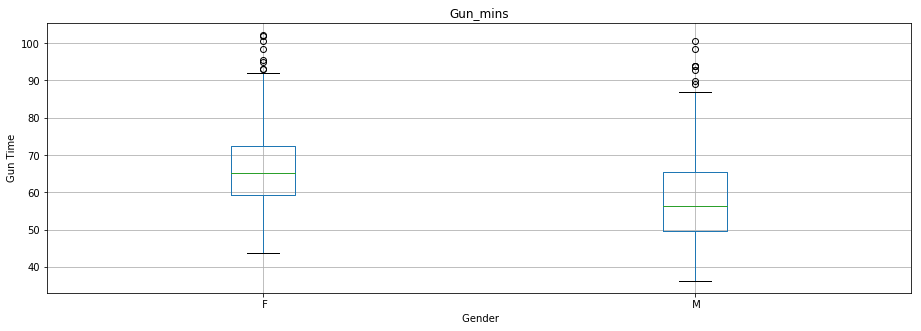

In [40]:
# Gun Time
df7.boxplot(column='Gun_mins', by=' Gender')
plt.ylabel('Gun Time')
plt.suptitle("")

# Count plot for Chip, Gun and Start Time for runners

In [41]:
x.value_counts().head()

55.716667    3
50.750000    3
55.183333    3
62.766667    3
52.166667    3
Name: Gun_mins, dtype: int64

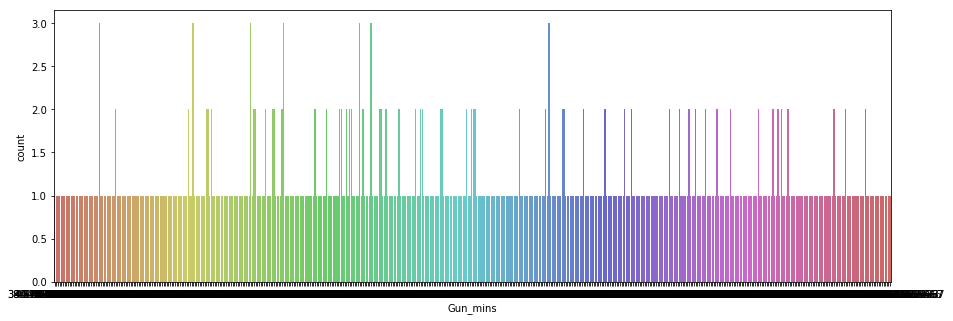

In [42]:
sns.countplot(x='Gun_mins',data=df7,palette='hls')
plt.show()

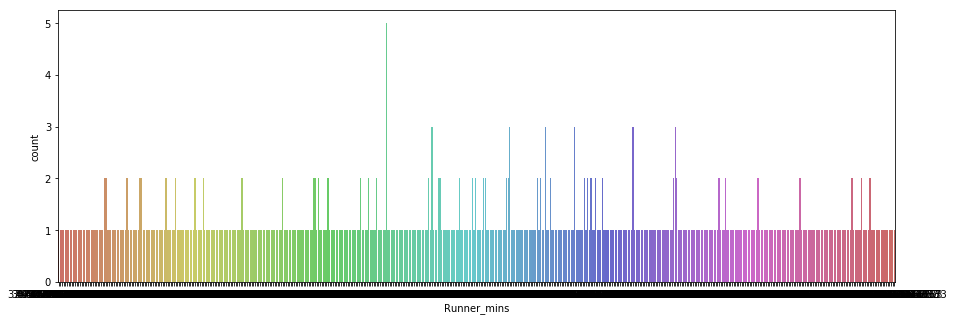

In [43]:
sns.countplot(x='Runner_mins',data=df7,palette='hls')
plt.show()

# Gender Based Conditional finish time comaparison

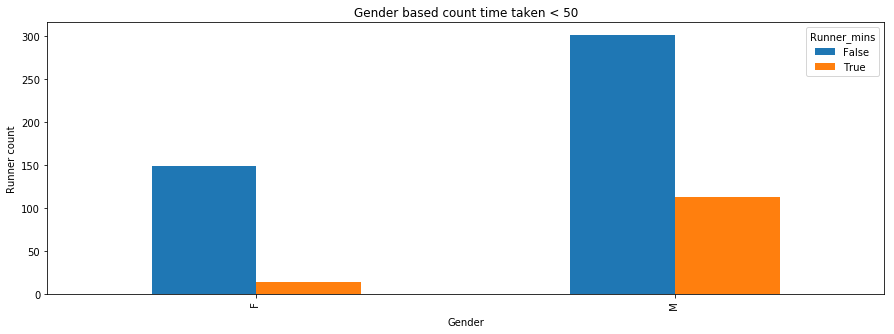

In [44]:
k1 = df7['Runner_mins'] < 50
pd.crosstab(df7[' Gender'],k1).plot(kind='bar')
plt.title('Gender based count time taken < 50')
plt.xlabel('Gender')
plt.ylabel('Runner count')
plt.show()

Text(0, 0.5, 'Runner_mins count')

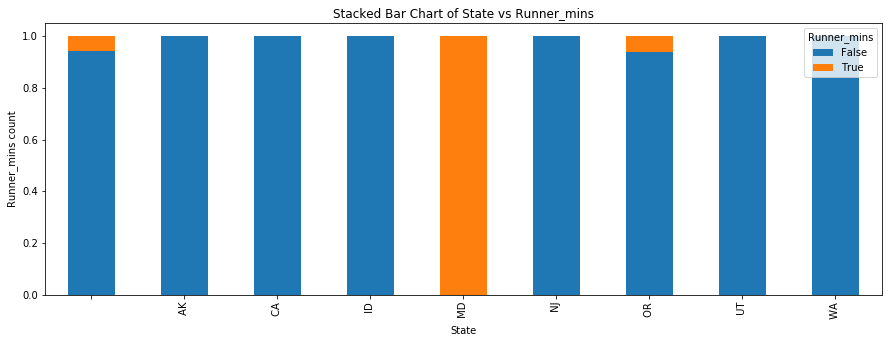

In [45]:
table=pd.crosstab(df7[' State'],df7['Runner_mins']>80)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of State vs Runner_mins')
plt.xlabel('State')
plt.ylabel('Runner_mins count')

# Runner's Chip time vs Gun Time

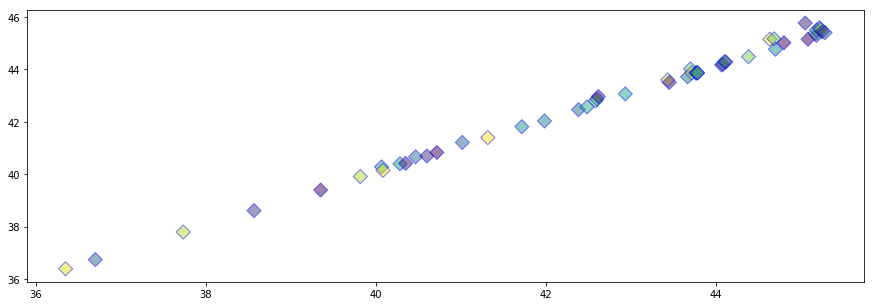

In [46]:
plt.scatter(x = df7['Runner_mins'][:50],y=df7['Gun_mins'][0:50],s=100,marker='D',c = np.random.rand(50),edgecolors='b',alpha=0.5)

In [47]:
df7 # Final DataFrame

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins,Gun_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000,36.400000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000,36.750000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333,37.800000
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667,38.616667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000,39.400000
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,,39.816667,39.916667
10,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,,40.066667,40.283333
11,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,,40.083333,40.150000
12,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B,40.283333,40.400000
13,10,3,ERIK BJORNSTAD,M,,,00:40:21,06:30,10 of 414,M 36-45,5 of 152,00:00:04,00:40:25,COLUMBIA TEAM A,40.350000,40.416667


In [48]:
# Minutes conversion for time to start
start_time_list = df7[' Time to Start'].tolist()

start_time_mins = []
for i in start_time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    start_time_mins.append(math)

In [49]:
df7['start_time_mins'] = start_time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins,Gun_mins,start_time_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000,36.400000,0.050000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000,36.750000,0.050000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333,37.800000,0.066667
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667,38.616667,0.050000
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000,39.400000,0.050000


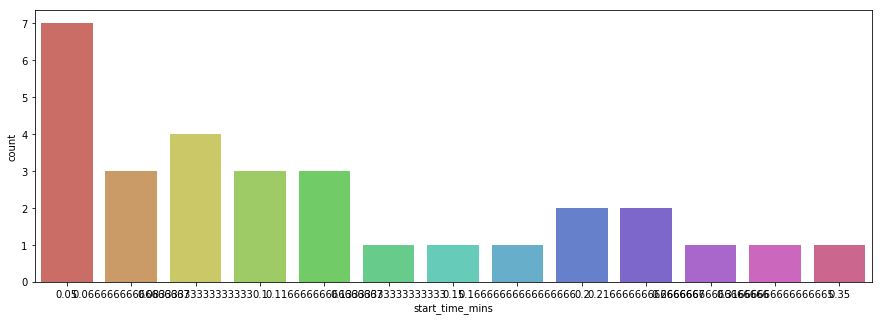

In [51]:
sns.countplot(x='start_time_mins',data=df7.head(30),palette='hls')
plt.show()

Text(0, 0.5, 'start_time_mins count')

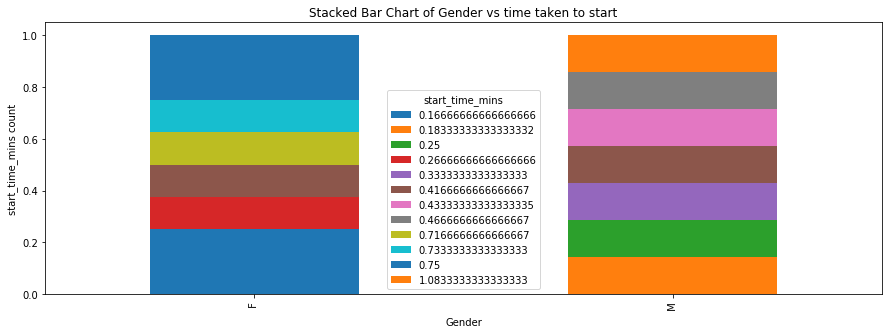

In [52]:
table=pd.crosstab(df7[' Gender'],df7['start_time_mins'][500:515])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs time taken to start')
plt.xlabel('Gender')
plt.ylabel('start_time_mins count')

# Correlation using HeatMap

In [53]:
a1 = df7.corr(method='pearson')
a1

,Runner_mins,Gun_mins,start_time_mins
Runner_mins,1.000000,0.999541,0.344405
Gun_mins,0.999541,1.000000,0.372702
start_time_mins,0.344405,0.372702,1.000000


In [54]:
a2 = df7.corr(method='kendall')
a2

,Runner_mins,Gun_mins,start_time_mins
Runner_mins,1.000000,0.981671,0.275164
Gun_mins,0.981671,1.000000,0.294012
start_time_mins,0.275164,0.294012,1.000000


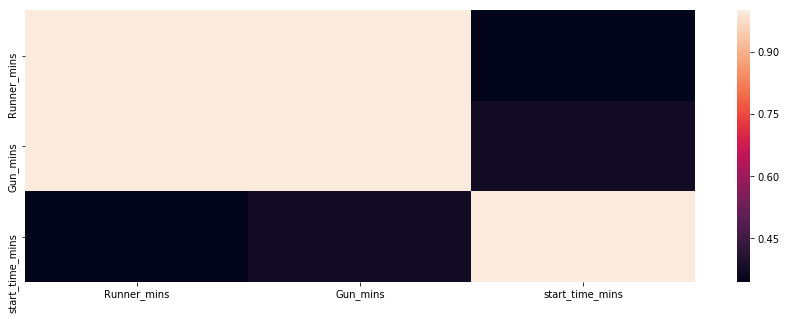

In [55]:
u1 = sns.heatmap(a1)

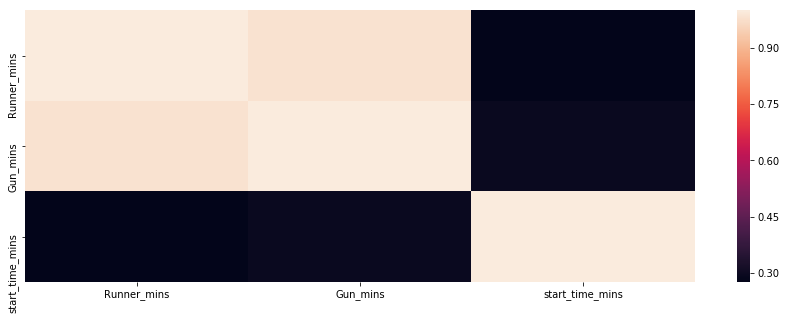

In [56]:
u2 = sns.heatmap(a2)